## Importar Librerías 

In [53]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

## Leer el Archivo CSV

In [54]:
# Cargar el archivo CSV en un DataFrame de pandas
input_file ='G:/Mi unidad/Meli/Netflix-Movies-and-TV-Shows/data/netflix_titles_cleaned.csv'
df = pd.read_csv(input_file, encoding='utf-8')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


## Análisis general 

In [55]:
# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB
None


In [56]:
# Verificar valores nulos
print("\nNúmero de valores nulos por columna:")
print(df.isnull().sum())



Número de valores nulos por columna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


**Transformamos los valores nulos de duración a enteros igual a cero**

In [58]:
# Limpiar la columna 'duration' y convertir a numérico
df['duration'] = df['duration'].astype(str)  # Asegurar que todos los datos sean cadenas
df['duration'] = df['duration'].str.replace(' min', '', regex=False)  # Remover ' min'
df['duration'] = df['duration'].str.replace(' Seasons', '', regex=False)  # Remover ' Seasons'
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Convertir a numérico, NaN si no puede convertir
df['duration'] = df['duration'].fillna(0).astype(int)  # Reemplazar NaN con 0 y convertir a entero

In [59]:
# Verificar si hay duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())



Número de filas duplicadas:
0


## Análisis de Duración

In [60]:
# Verificar valores únicos en la columna 'type'
unique_types = df['type'].unique()
print("Valores únicos en la columna 'type':", unique_types)

# Verificar si hay valores nulos en la columna 'type'
null_values = df['type'].isnull().sum()
print("Número de valores nulos en la columna 'type':", null_values)

# Verificar la cantidad de cada tipo en la columna 'type'
type_counts = df['type'].value_counts()
print("\nConteo de cada tipo en la columna 'type':")
print(type_counts)

Valores únicos en la columna 'type': ['Movie' 'TV Show']
Número de valores nulos en la columna 'type': 0

Conteo de cada tipo en la columna 'type':
type
Movie      6132
TV Show    2677
Name: count, dtype: int64


In [61]:
# Separar películas y series
movies = df[df['type'] == 'Movie'].copy()
shows = df[df['type'] == 'TV Show'].copy()

In [62]:
# Convertir todos los valores en 'duration' a string
movies['duration'] = movies['duration'].astype(str)
shows['duration'] = shows['duration'].astype(str)

# Reemplazar valores nulos en la columna 'duration' con '0' antes de convertir
movies['duration'] = movies['duration'].str.replace(' min', '').replace('nan', '0').astype(int)
shows['duration'] = shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').replace('nan', '0').astype(int)



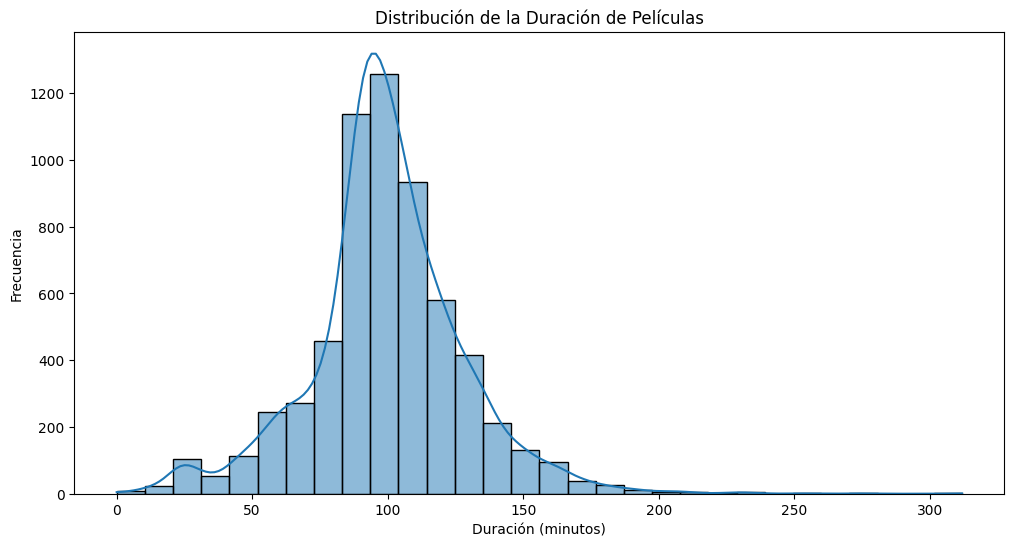

In [63]:
# Visualizar la distribución de la duración de películas
plt.figure(figsize=(12, 6))
sns.histplot(movies['duration'], kde=True, bins=30)
plt.title('Distribución de la Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()


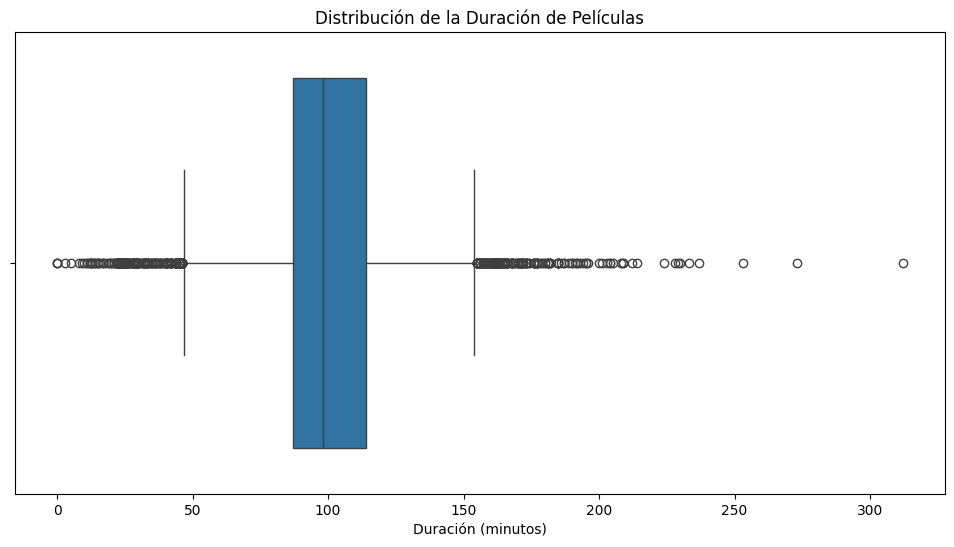

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja para la duración de películas
plt.figure(figsize=(12, 6))
sns.boxplot(x=movies['duration'])
plt.title('Distribución de la Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.show()

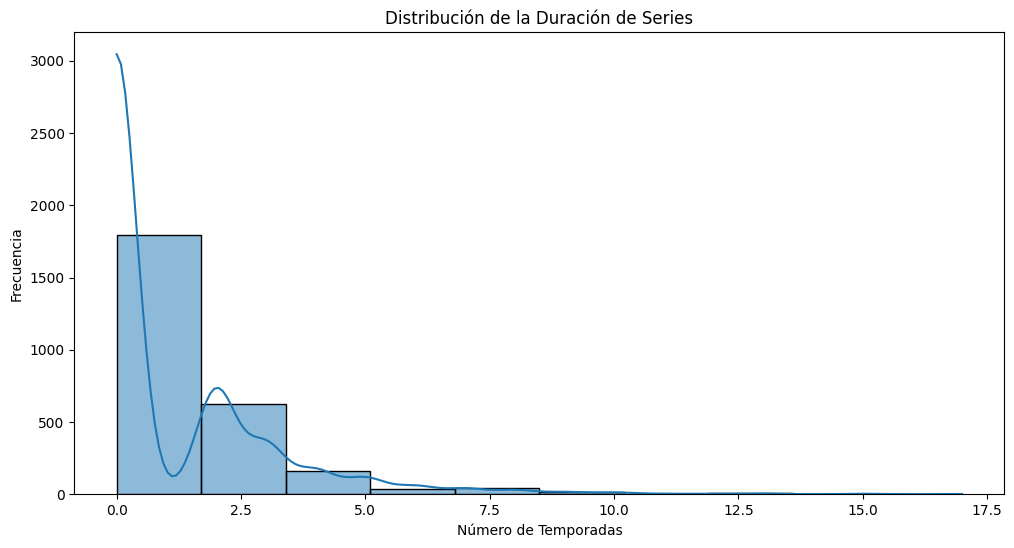

In [65]:
# Visualizar la distribución de la duración de series
plt.figure(figsize=(12, 6))
sns.histplot(shows['duration'], kde=True, bins=10)
plt.title('Distribución de la Duración de Series')
plt.xlabel('Número de Temporadas')
plt.ylabel('Frecuencia')
plt.show()

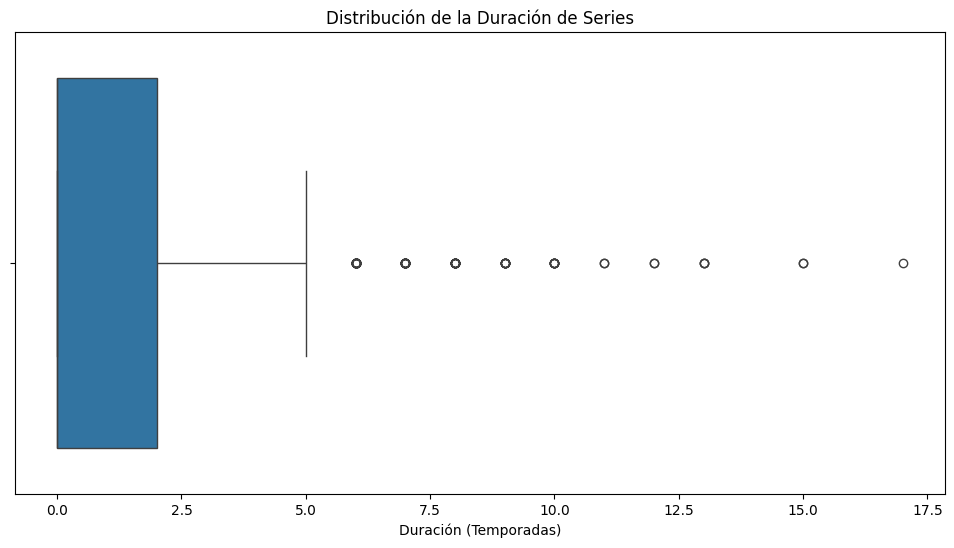

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja para la duración de películas
plt.figure(figsize=(12, 6))
sns.boxplot(x=shows['duration'])
plt.title('Distribución de la Duración de Series')
plt.xlabel('Duración (Temporadas)')
plt.show()

## Análisis Tendencia

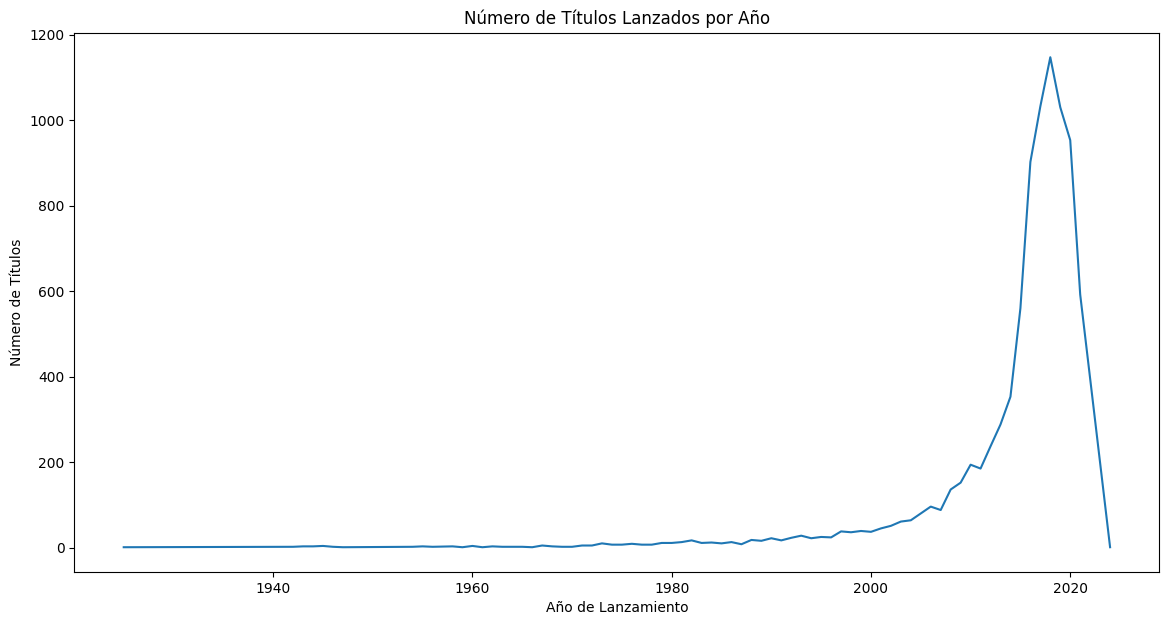

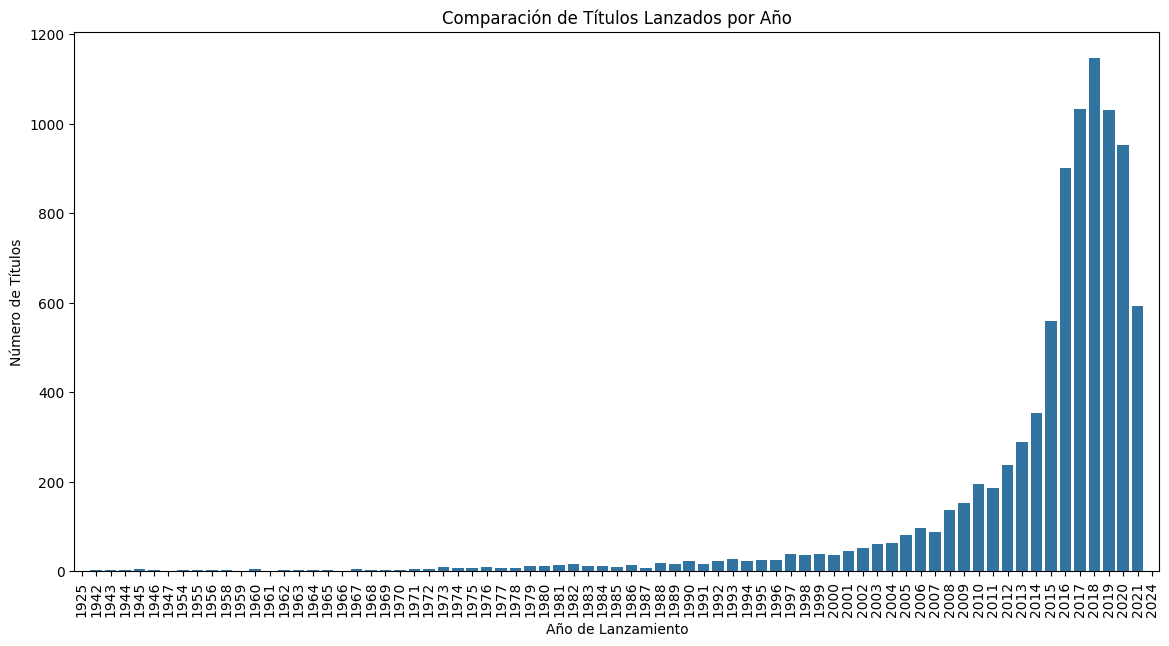

In [72]:
# Contar títulos por año de lanzamiento
titles_per_year = df.groupby('release_year').size().reset_index(name='count')

# Visualizar la tendencia de lanzamientos por año
plt.figure(figsize=(14, 7))
sns.lineplot(data=titles_per_year, x='release_year', y='count')
plt.title('Número de Títulos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Títulos')
plt.show()

# Visualizar la comparación de lanzamientos por año
plt.figure(figsize=(14, 7))
sns.barplot(data=titles_per_year, x='release_year', y='count')
plt.title('Comparación de Títulos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=90)
plt.show()


<Figure size 1400x600 with 0 Axes>

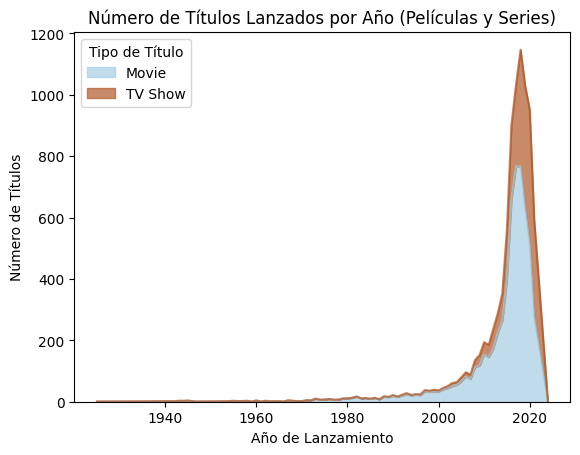

In [75]:
# Contar títulos por año de lanzamiento y tipo
titles_per_year = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Pivotear los datos para facilitar el gráfico de áreas acumuladas
titles_per_year_pivot = titles_per_year.pivot(index='release_year', columns='type', values='count').fillna(0)

# Visualizar la tendencia de lanzamientos por año con gráfico de área acumulado
plt.figure(figsize=(14, 6))
titles_per_year_pivot.plot(kind='area', stacked=True, colormap='Paired', alpha=0.7)
plt.title('Número de Títulos Lanzados por Año (Películas y Series)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Títulos')
plt.legend(title='Tipo de Título')
plt.show()

In [76]:
# Filtrar datos del año 2000 en adelante
df_filtered = df[df['release_year'] >= 2000]

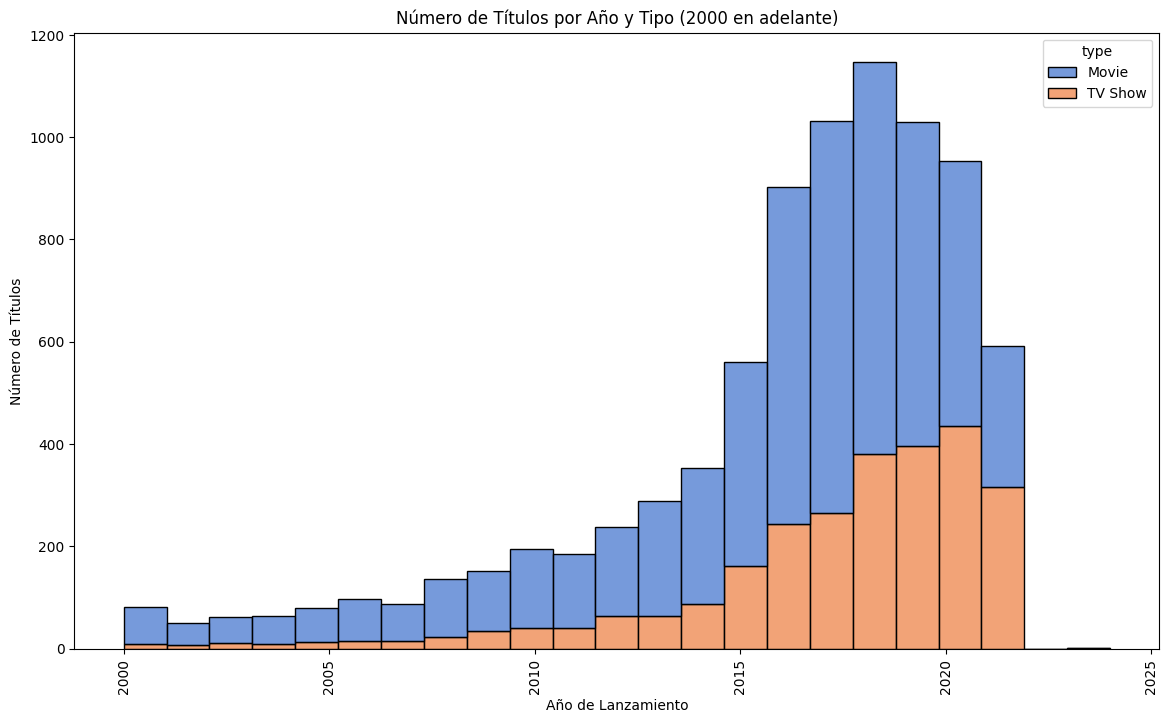

In [95]:
# Crear el gráfico de barra acumulado
plt.figure(figsize=(14, 8))

sns.histplot(
    data=df_filtered,
    x='release_year',
    hue='type',
    multiple='stack',
    palette='muted',
    bins=len(df_filtered['release_year'].unique())
)

plt.title('Número de Títulos por Año y Tipo (2000 en adelante)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=90)
plt.show()

## Análisis Adicionales

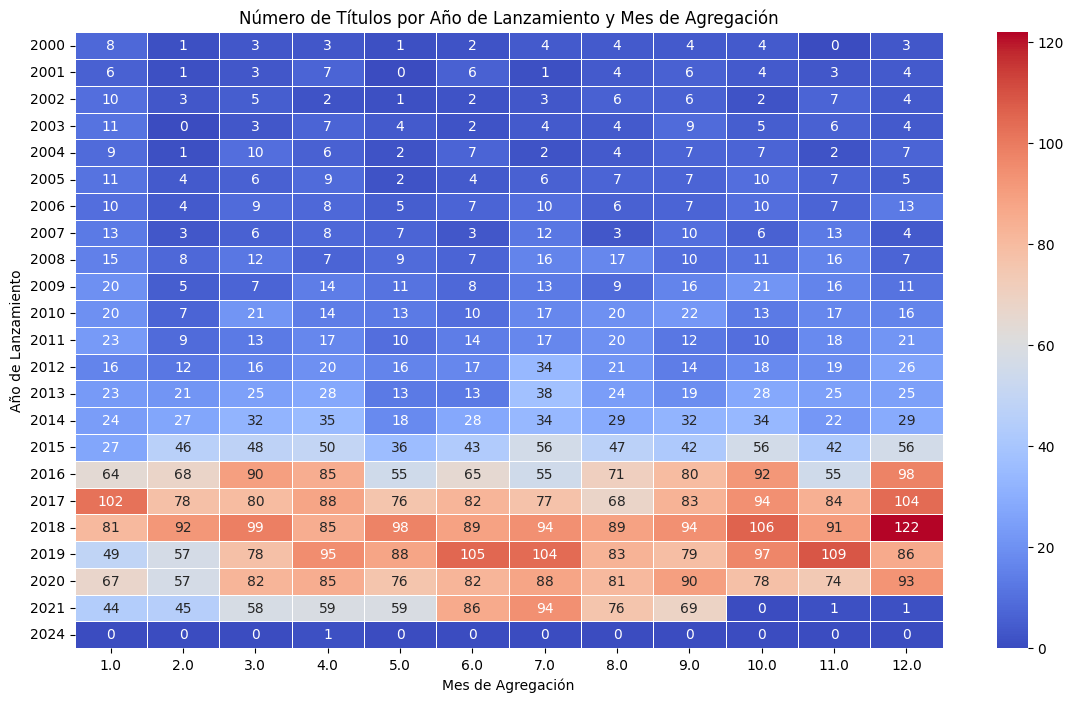

In [93]:
# Convertir 'date_added' a datetime, ignorando los errores
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extraer el mes de 'date_added'
df['month_added'] = df['date_added'].dt.month

# Crear una tabla de contingencia que cuenta el número de títulos por combinación de 'release_year' y 'month_added'
contingency_table = pd.crosstab(df_filtered['release_year'], df_filtered['month_added'])

# Crear el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
plt.title('Número de Títulos por Año de Lanzamiento y Mes de Agregación')
plt.xlabel('Mes de Agregación')
plt.ylabel('Año de Lanzamiento')
plt.show()